In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

In [3]:
DF_Debt = pd.read_csv('/content/drive/MyDrive/DF_Debt.csv')
DF_Debt

,consumer complaint narrative,product,issue
0,I am writing to formally express my concern ab...,Debt collection,Written notification about debt
1,"I am writing to dispute a fraudulent account, ...",Debt collection,Written notification about debt
2,I am writing to bring to your attention an ong...,Debt collection,Written notification about debt
3,Opened XX/XX/2021 {$180.00} owed Contacted the...,Debt collection,Attempts to collect debt not owed
4,Complaint was made before on servicer Shellpoi...,Debt collection,Took or threatened to take negative or legal a...
...,...,...,...
167466,DIAZ & ASSOCIATES XXXX XXXX XXXX XXXX XXXX XXX...,Debt collection,Took or threatened to take negative or legal a...
167467,"They claim I took out a loan with them, but I ...",Debt collection,Communication tactics
167468,I received a notification from XXXX that a col...,Debt collection,Written notification about debt
167469,Reached out to XXXX and XXXX XXXX XXXXXXXX reg...,Debt collection,Written notification about debt


# 자연어처리

In [4]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF_Debt['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF_Debt['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
lower = [text.lower() for text in DF_Debt['narrative'].values]
DF_Debt['narrative'] = lower

In [6]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF_Debt["narrative"]=DF_Debt["narrative"].apply(lambda x: remove_stopwords(x))

DF_Debt.head()

,consumer complaint narrative,product,issue,narrative
0,I am writing to formally express my concern ab...,Debt collection,Written notification about debt,writing formally express concern inaccurate in...
1,"I am writing to dispute a fraudulent account, ...",Debt collection,Written notification about debt,writing dispute fraudulent account credit repo...
2,I am writing to bring to your attention an ong...,Debt collection,Written notification about debt,writing bring attention ongoing concerning mat...
3,Opened XX/XX/2021 {$180.00} owed Contacted the...,Debt collection,Attempts to collect debt not owed,opened 2021 18000 owed contacted company contr...
4,Complaint was made before on servicer Shellpoi...,Debt collection,Took or threatened to take negative or legal a...,complaint made servicer shellpoint complaint n...


# 데이터 추출 및 컬럼명 변경

In [7]:
DF_test = DF_Debt[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
0,writing formally express concern inaccurate in...,Written notification about debt
1,writing dispute fraudulent account credit repo...,Written notification about debt
2,writing bring attention ongoing concerning mat...,Written notification about debt
3,opened 2021 18000 owed contacted company contr...,Attempts to collect debt not owed
4,complaint made servicer shellpoint complaint n...,Took or threatened to take negative or legal a...
...,...,...
167466,diaz associates ca received random letter mail...,Took or threatened to take negative or legal a...
167467,claim took loan say perhaps identity stolen cr...,Communication tactics
167468,received notification collection account added...,Written notification about debt
167469,reached regarding validity debt provide lookin...,Written notification about debt


# 데이터 분할

In [8]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(150723, 2) (150723,) (16748, 2) (16748,)


In [9]:
x_train.head()

,text,label
32124,talked midland funding tried resolve said woul...,Took or threatened to take negative or legal a...
148451,sent disputes several times company stating vi...,Written notification about debt
55972,2022 hospitalized due severe illness since hos...,Written notification about debt
133433,hello cfpb please help short never notified sa...,Written notification about debt
146521,medicredit inc 5100 knowledge debt collection ...,Written notification about debt


In [10]:
x_test

,text,label
50121,harassed collection agency named linebarger go...,Communication tactics
39742,applied apartment around 2022 declined admissi...,False statements or representation
36335,continue receive calls listed debt collector c...,Attempts to collect debt not owed
80391,sends letters saying owe 23000 disputed based ...,Attempts to collect debt not owed
64053,keep calling emailing debt never ever heard ca...,Communication tactics
...,...,...
123269,writing delete following information file item...,Attempts to collect debt not owed
152881,kind account placed charged account sure infor...,Attempts to collect debt not owed
47163,dont remember account collectorcreditor ive as...,Attempts to collect debt not owed
120361,organization purchased debt issue capital one ...,Attempts to collect debt not owed


# 데이터셋 만들기




In [11]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/150723 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/16748 [00:00<?, ? examples/s]

In [12]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 150723
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 16748
    })
})

# 토큰화

In [13]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [16]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [17]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/150723 [00:00<?, ? examples/s]

Map:   0%|          | 0/16748 [00:00<?, ? examples/s]

# 패딩?

In [18]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True, max_length = 100)

# 성능평가 함수

In [19]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 모델

In [ ]:
DF_Debt['issue'].value_counts()

issue
Attempts to collect debt not owed                      82825
Written notification about debt                        33813
Took or threatened to take negative or legal action    17890
False statements or representation                     17468
Communication tactics                                  15475
Name: count, dtype: int64

In [20]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=5).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
tokenized_corpus["validation"].features

# 빠인뜌닝

In [ ]:
training_args = TrainingArguments(
    output_dir="best_model_Debt_Trans",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model()

{'loss': 1.1553, 'grad_norm': 12.36181926727295, 'learning_rate': 1.946927077804904e-05, 'epoch': 0.05307292219509606}
{'loss': 1.0512, 'grad_norm': 6.565062999725342, 'learning_rate': 1.893854155609808e-05, 'epoch': 0.10614584439019212}
{'loss': 1.0097, 'grad_norm': 8.687721252441406, 'learning_rate': 1.8407812334147118e-05, 'epoch': 0.1592187665852882}
{'loss': 0.9738, 'grad_norm': 8.01475715637207, 'learning_rate': 1.787708311219616e-05, 'epoch': 0.21229168878038424}
{'loss': 0.9675, 'grad_norm': 9.282830238342285, 'learning_rate': 1.73463538902452e-05, 'epoch': 0.2653646109754803}
{'loss': 0.9362, 'grad_norm': 11.0880126953125, 'learning_rate': 1.6815624668294238e-05, 'epoch': 0.3184375331705764}
{'loss': 0.931, 'grad_norm': 11.135207176208496, 'learning_rate': 1.6284895446343277e-05, 'epoch': 0.37151045536567245}
{'loss': 0.9136, 'grad_norm': 17.854291915893555, 'learning_rate': 1.5754166224392315e-05, 'epoch': 0.42458337756076847}
{'loss': 0.9103, 'grad_norm': 9.109077453613281, 

In [ ]:
trainer.save_model()

In [ ]:
# Empty cache
torch.cuda.empty_cache()

In [ ]:
pred_output = trainer.predict(tokenized_corpus["validation"])
pred_output

PredictionOutput(predictions=array([[ 1.2221338 , -2.3528028 , -0.6709213 , -0.2987615 ,  2.604315  ],
       [ 2.8811262 , -2.3737605 ,  0.8775817 ,  0.0246356 , -0.89461046],
       [ 3.4871814 , -2.6045961 ,  0.39652956, -0.33085996, -0.2743746 ],
       ...,
       [ 4.010764  , -1.9345897 , -0.19072622, -0.12698051, -0.8347438 ],
       [ 2.014342  , -0.92512643,  0.20977315, -0.43208385, -0.84899545],
       [ 2.591998  , -2.0652509 ,  0.06172504, -0.37315798,  0.18253678]],
      dtype=float32), label_ids=array([4, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.8480367660522461, 'test_accuracy': 0.6860520659183186, 'test_runtime': 334.4505, 'test_samples_per_second': 50.076, 'test_steps_per_second': 3.131})

In [ ]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

Output Predition: (16748, 5)
[[ 1.2221338  -2.3528028  -0.6709213  -0.2987615   2.604315  ]
 [ 2.8811262  -2.3737605   0.8775817   0.0246356  -0.89461046]
 [ 3.4871814  -2.6045961   0.39652956 -0.33085996 -0.2743746 ]
 ...
 [ 4.010764   -1.9345897  -0.19072622 -0.12698051 -0.8347438 ]
 [ 2.014342   -0.92512643  0.20977315 -0.43208385 -0.84899545]
 [ 2.591998   -2.0652509   0.06172504 -0.37315798  0.18253678]]


In [ ]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(16748,)
Predictions: [4 0 0 ... 0 0 0]


In [ ]:
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

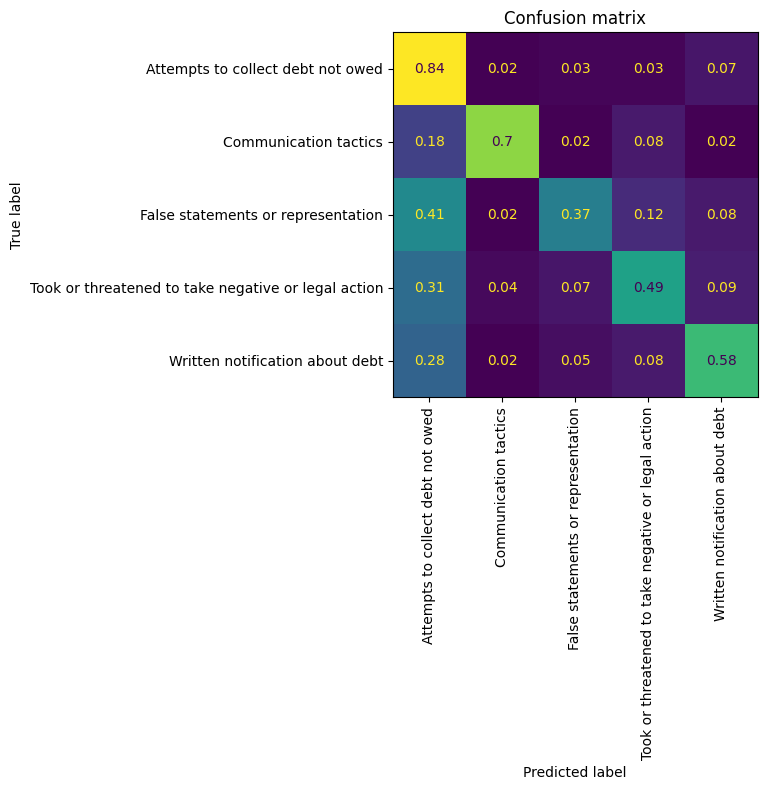

In [ ]:
# Validation
plot_confusion_matrix(y_preds,y_valid,labels)